# Initial Graphs

Graphing data for exploratory data analysis.

In [7]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Data/merged_no_years.csv')
df.head()

,Max AQI,ua_pop,tc_goal,treecanopy,tc_gap,priority_i,pctpocnorm,pctpovnorm,unemplnorm,dep_perc,depratnorm,lingnorm,health_nor,temp_norm,tesctyscor,child_perc,seniorperc,land_area,biome
0,43.449036,769737.0,0.150000,NaN,NaN,0.419484,0.603916,0.352494,0.098893,0.374591,0.322593,0.080682,0.408857,0.617441,87.0,0.202417,0.172174,410.526427,Desert
1,32.800587,630366.0,0.446445,NaN,NaN,0.435847,0.660677,0.454438,0.131342,0.353064,0.312784,0.090111,0.455816,0.506973,86.0,0.207871,0.145193,254.332374,Forest
2,34.799342,1958685.0,0.481818,NaN,NaN,0.417424,0.764982,0.195288,0.176067,0.402655,0.365349,0.115404,0.412324,0.439439,90.0,0.246871,0.155784,16.779289,Forest
3,36.988858,327378.0,0.300000,NaN,NaN,0.376885,0.262817,0.263417,0.391340,0.399427,0.277407,0.140373,0.567411,0.250785,70.0,0.167222,0.232205,7.163644,Mediterranean
4,35.195906,776256.0,0.473593,NaN,NaN,0.475231,0.768930,0.508043,0.131399,0.345630,0.309300,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest


## Missing Data

The tree canopy and tc_gap columns are mostly NAs so they can be dropped.

In [9]:
df.isnull().sum()

Max AQI        0
ua_pop         0
tc_goal        0
treecanopy    60
tc_gap        60
priority_i     0
pctpocnorm     0
pctpovnorm     0
unemplnorm     0
dep_perc       0
depratnorm     0
lingnorm       0
health_nor     0
temp_norm      0
tesctyscor     0
child_perc     0
seniorperc     0
land_area      0
biome          0
dtype: int64

In [10]:
df = df.drop(['treecanopy', 'tc_gap'], axis = 1)

In [11]:
df.head()

,Max AQI,ua_pop,tc_goal,priority_i,pctpocnorm,pctpovnorm,unemplnorm,dep_perc,depratnorm,lingnorm,health_nor,temp_norm,tesctyscor,child_perc,seniorperc,land_area,biome
0,43.449036,769737.0,0.150000,0.419484,0.603916,0.352494,0.098893,0.374591,0.322593,0.080682,0.408857,0.617441,87.0,0.202417,0.172174,410.526427,Desert
1,32.800587,630366.0,0.446445,0.435847,0.660677,0.454438,0.131342,0.353064,0.312784,0.090111,0.455816,0.506973,86.0,0.207871,0.145193,254.332374,Forest
2,34.799342,1958685.0,0.481818,0.417424,0.764982,0.195288,0.176067,0.402655,0.365349,0.115404,0.412324,0.439439,90.0,0.246871,0.155784,16.779289,Forest
3,36.988858,327378.0,0.300000,0.376885,0.262817,0.263417,0.391340,0.399427,0.277407,0.140373,0.567411,0.250785,70.0,0.167222,0.232205,7.163644,Mediterranean
4,35.195906,776256.0,0.473593,0.475231,0.768930,0.508043,0.131399,0.345630,0.309300,0.119654,0.501625,0.579516,75.0,0.172472,0.173158,274.914022,Forest


In [12]:
# dividing data
numerical_features = df.drop(['biome', 'Max AQI'], axis = 1)
categorical_features = df[['biome']]
df_y = df['Max AQI']

## Numeric Data

              ua_pop   tc_goal  priority_i  pctpocnorm  pctpovnorm  \
ua_pop      1.000000 -0.170511   -0.090479    0.208910   -0.204150   
tc_goal    -0.170511  1.000000   -0.250613   -0.215421   -0.015472   
priority_i -0.090479 -0.250613    1.000000    0.737223    0.769971   
pctpocnorm  0.208910 -0.215421    0.737223    1.000000    0.398831   
pctpovnorm -0.204150 -0.015472    0.769971    0.398831    1.000000   
unemplnorm -0.362726 -0.115061    0.552422    0.185143    0.374010   
dep_perc   -0.269038  0.011418    0.254126    0.096616    0.209184   
depratnorm -0.247012 -0.003879    0.228197    0.161882    0.147970   
lingnorm   -0.147653 -0.290018    0.732627    0.311152    0.481047   
health_nor -0.319148 -0.071286    0.652352    0.190639    0.655109   
temp_norm   0.167206 -0.259854    0.538372    0.337405    0.330712   
tesctyscor  0.140012  0.268401   -0.676520   -0.340707   -0.439840   
child_perc  0.002255 -0.229329    0.424047    0.507239    0.186242   
seniorperc -0.300115

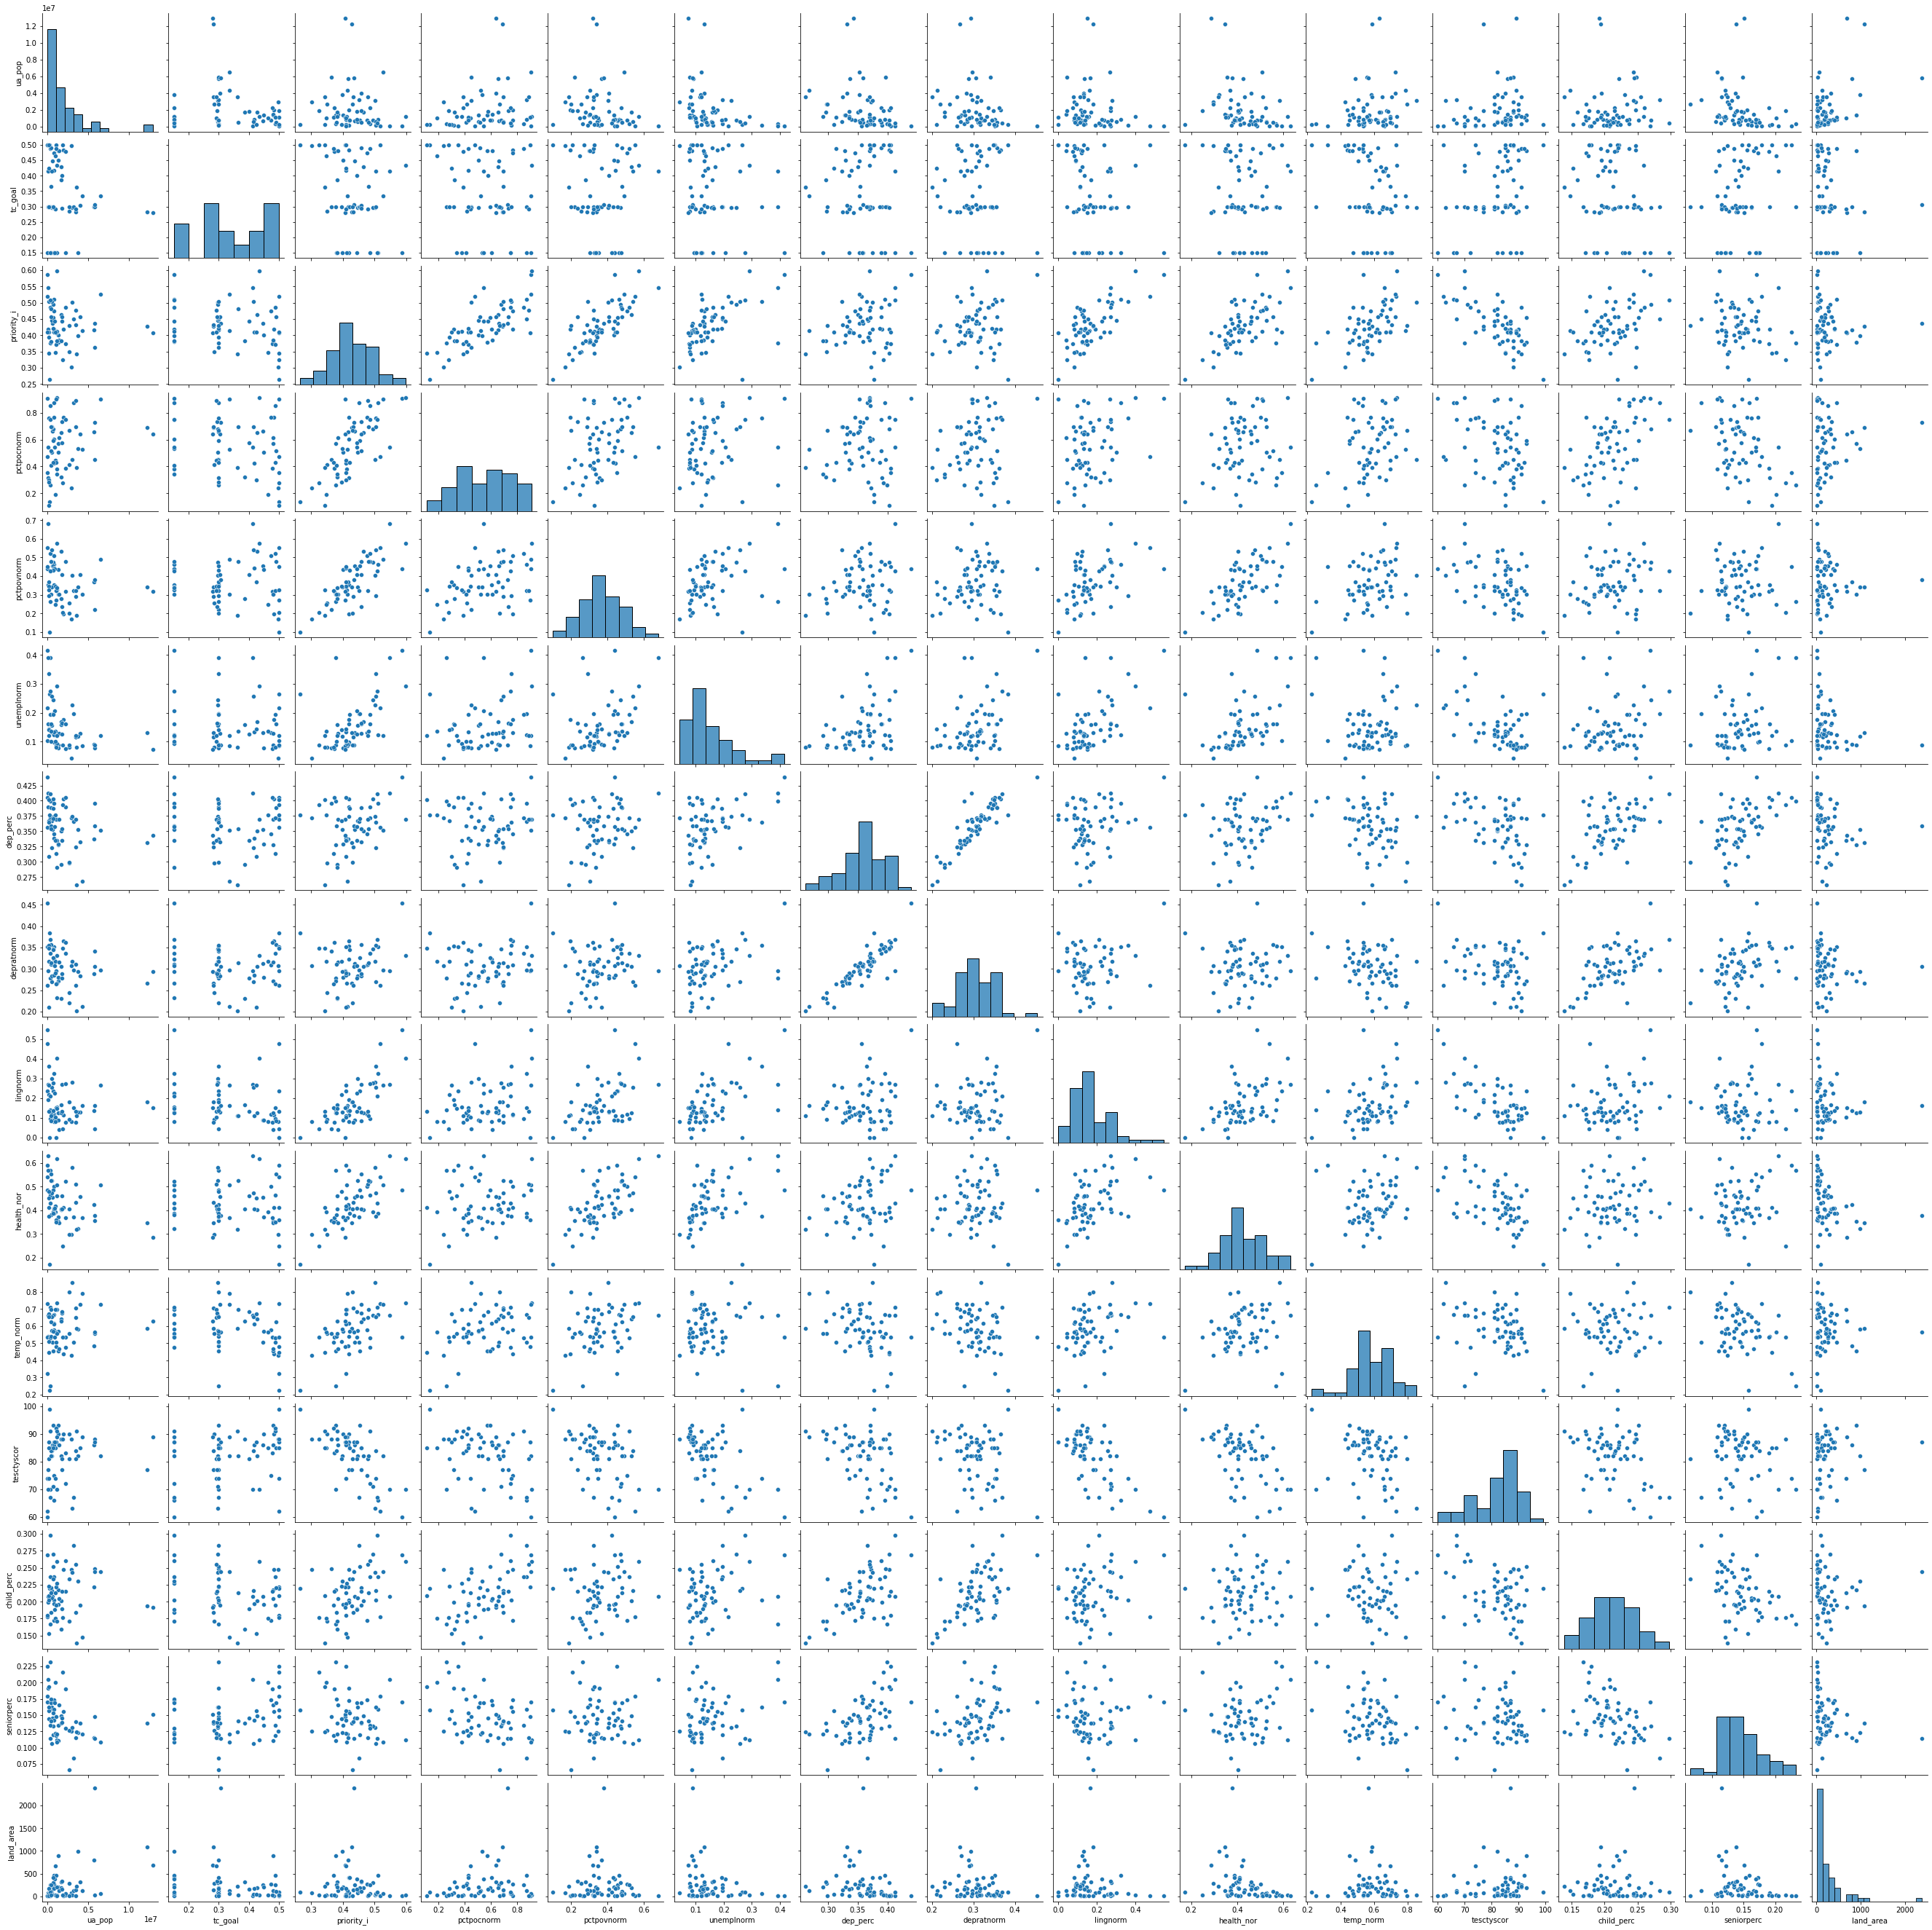

In [13]:
matrix = numerical_features.corr()
print(matrix)
sns.pairplot(numerical_features)

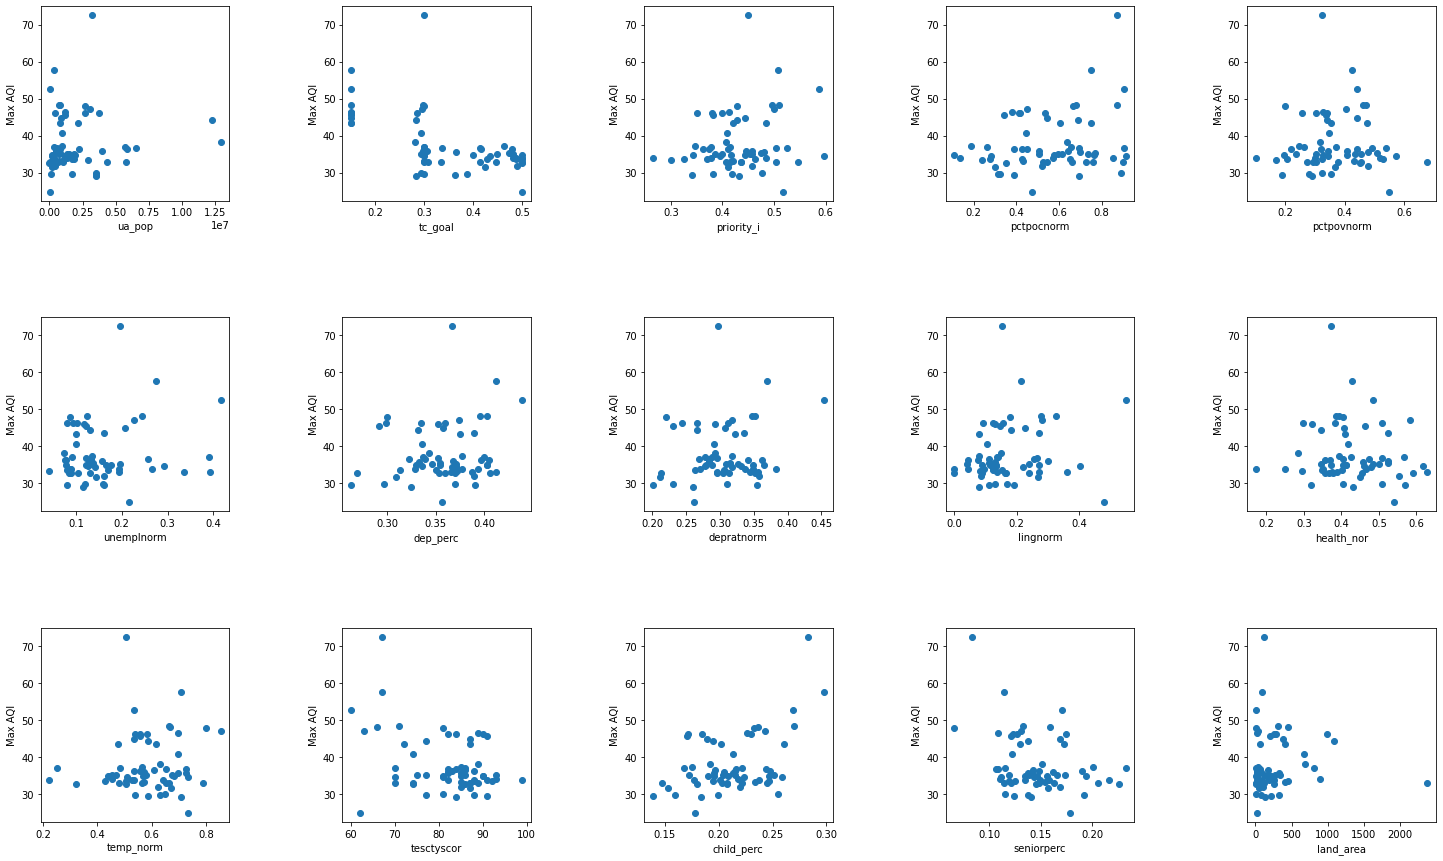

In [14]:
fig, axarr = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace = .6, wspace = .6)

col = numerical_features.columns
count = 1
counter1 = 0
counter2 = 0
for c in col:
    axarr[counter1, counter2].scatter(data = df, x = c, y = 'Max AQI')
    axarr[counter1, counter2].set_xlabel(c)
    axarr[counter1, counter2].set_ylabel("Max AQI")
    count += 1
    if count in range(0,6):
        counter2 += 1
    if count == 6:
            counter2 = -1
            counter1 = 1
    if count in range(6,11):
        counter2 += 1
    if count == 11:
        counter2 = -1
        counter1 = 2
    if count in range(11,20):
        counter2 += 1

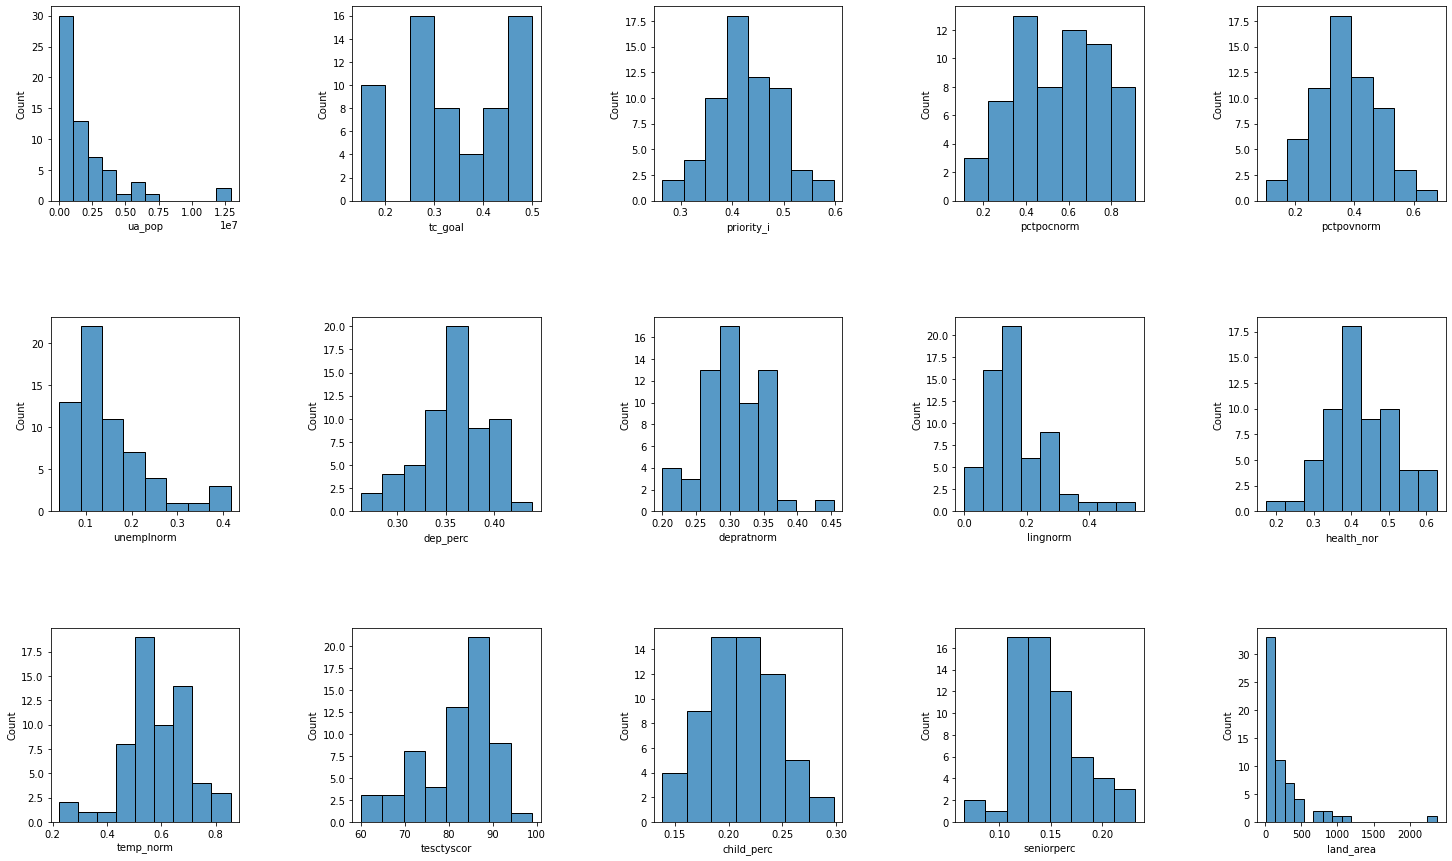

In [15]:
fig, axarr = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace = .6, wspace = .6)

col = numerical_features.columns
count = 1
counter1 = 0
counter2 = 0
for c in col:
    sns.histplot(ax = axarr[counter1, counter2], data = df, x = c)
    axarr[counter1, counter2].set_xlabel(c)
    count += 1
    if count in range(0,6):
        counter2 += 1
    if count == 6:
            counter2 = -1
            counter1 = 1
    if count in range(6,11):
        counter2 += 1
    if count == 11:
        counter2 = -1
        counter1 = 2
    if count in range(11,20):
        counter2 += 1

## Categorical Data

<AxesSubplot: xlabel='biome', ylabel='count'>

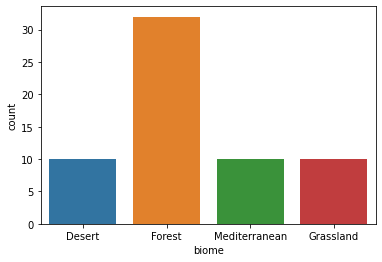

In [16]:
sns.countplot(data = df, x='biome')

<AxesSubplot: xlabel='Max AQI', ylabel='biome'>

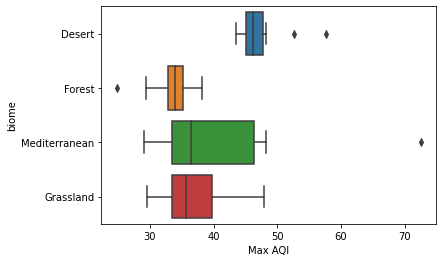

In [17]:
sns.boxplot(data=df, y='biome', x = 'Max AQI')